<a href="https://colab.research.google.com/github/PRNeharkar/CapstoneRoboGarden/blob/main/CapstoneProjectDEEPLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikeras
!pip install feature_engine

  Using cached scikit_learn-1.3.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.9 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
feature-engine 1.8.3 requires scikit-learn>=1.4.0, but you have scikit-learn 1.3.0 which is incompatible.
scikeras 0.13.0 requires scikit-learn>=1.4.2, but you have scikit-learn 1.3.0 which is incompatible.
umap-learn 0.5.8 requires scikit-learn>=1.6, but you have scikit-learn 1.3.0 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.3.0 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.3.0 which is incompatible.
  Using cached scikit_learn-1.7.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.me

In [ ]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==1.3.0

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--- Initial Data Overview ---
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 

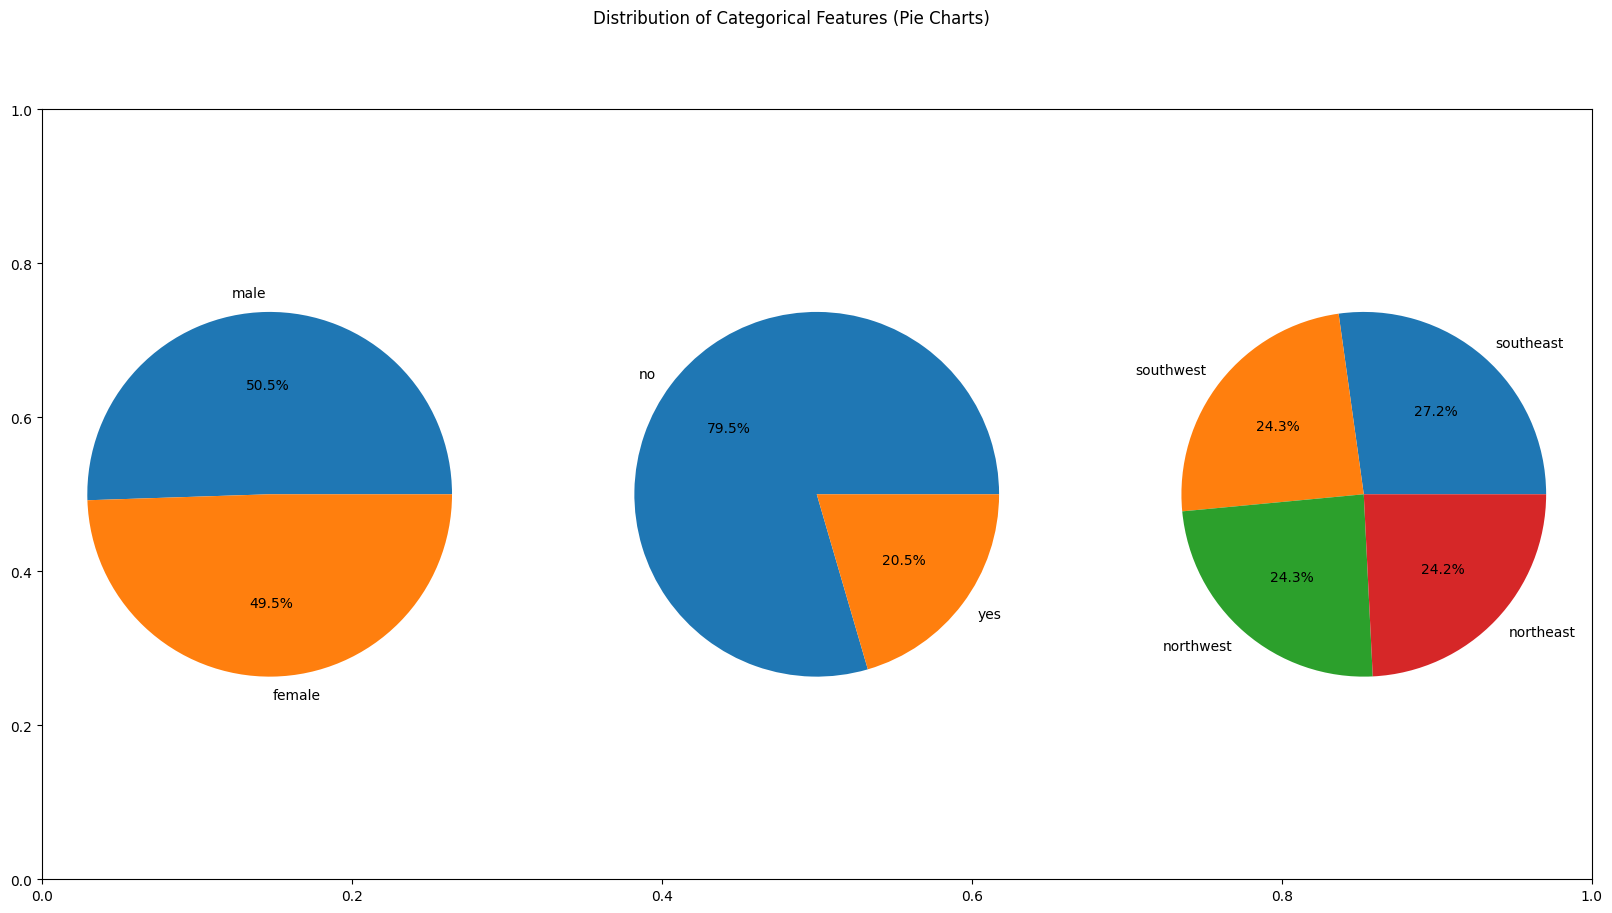

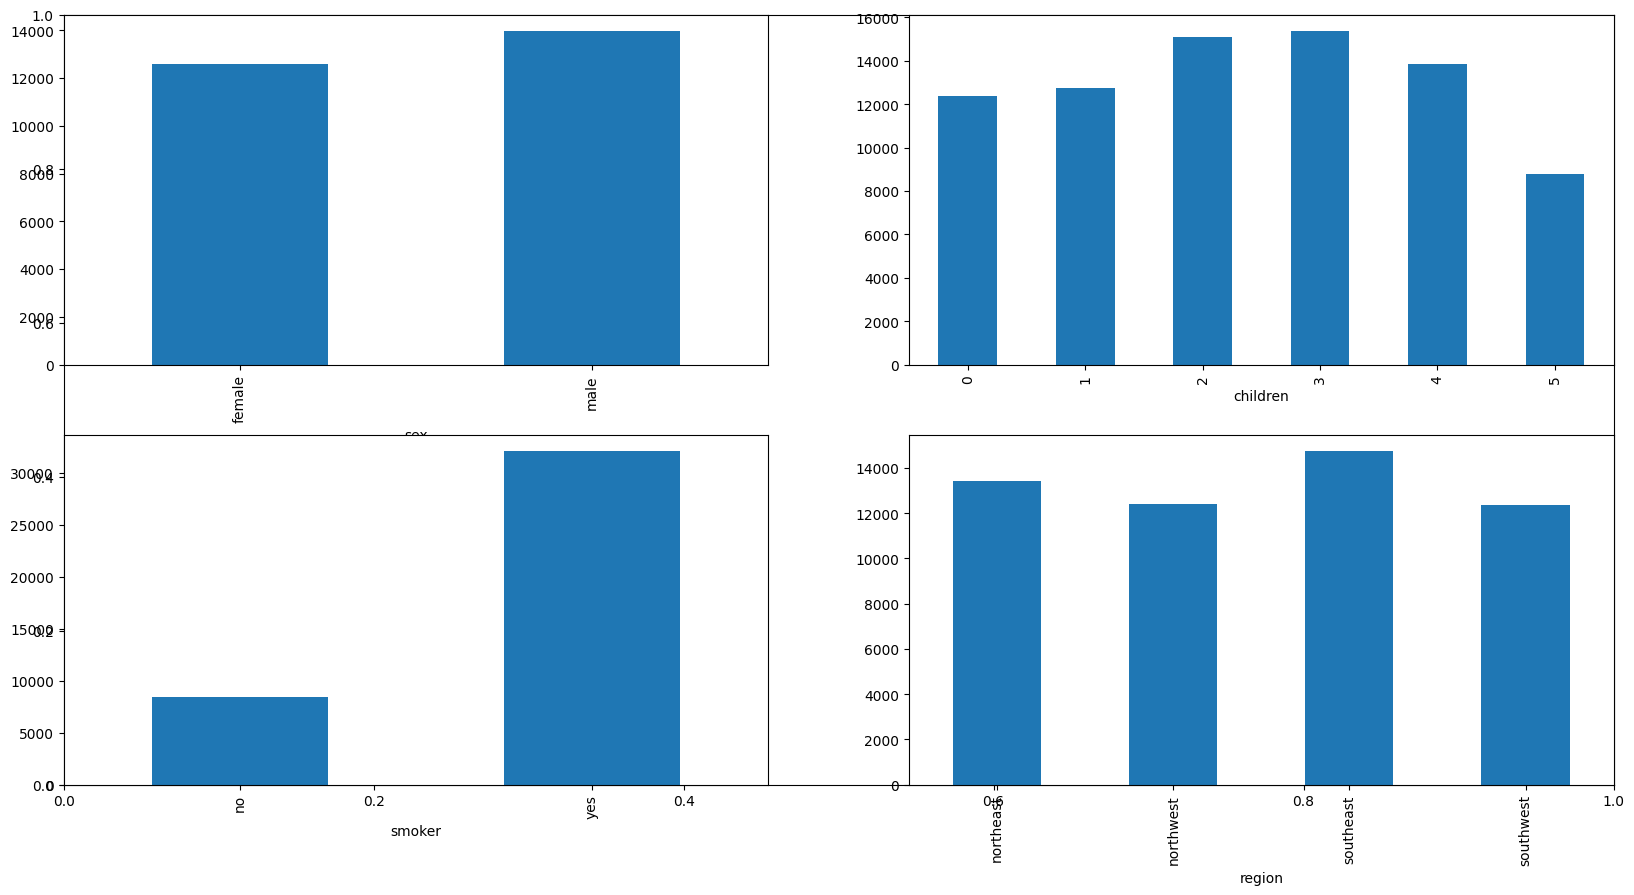

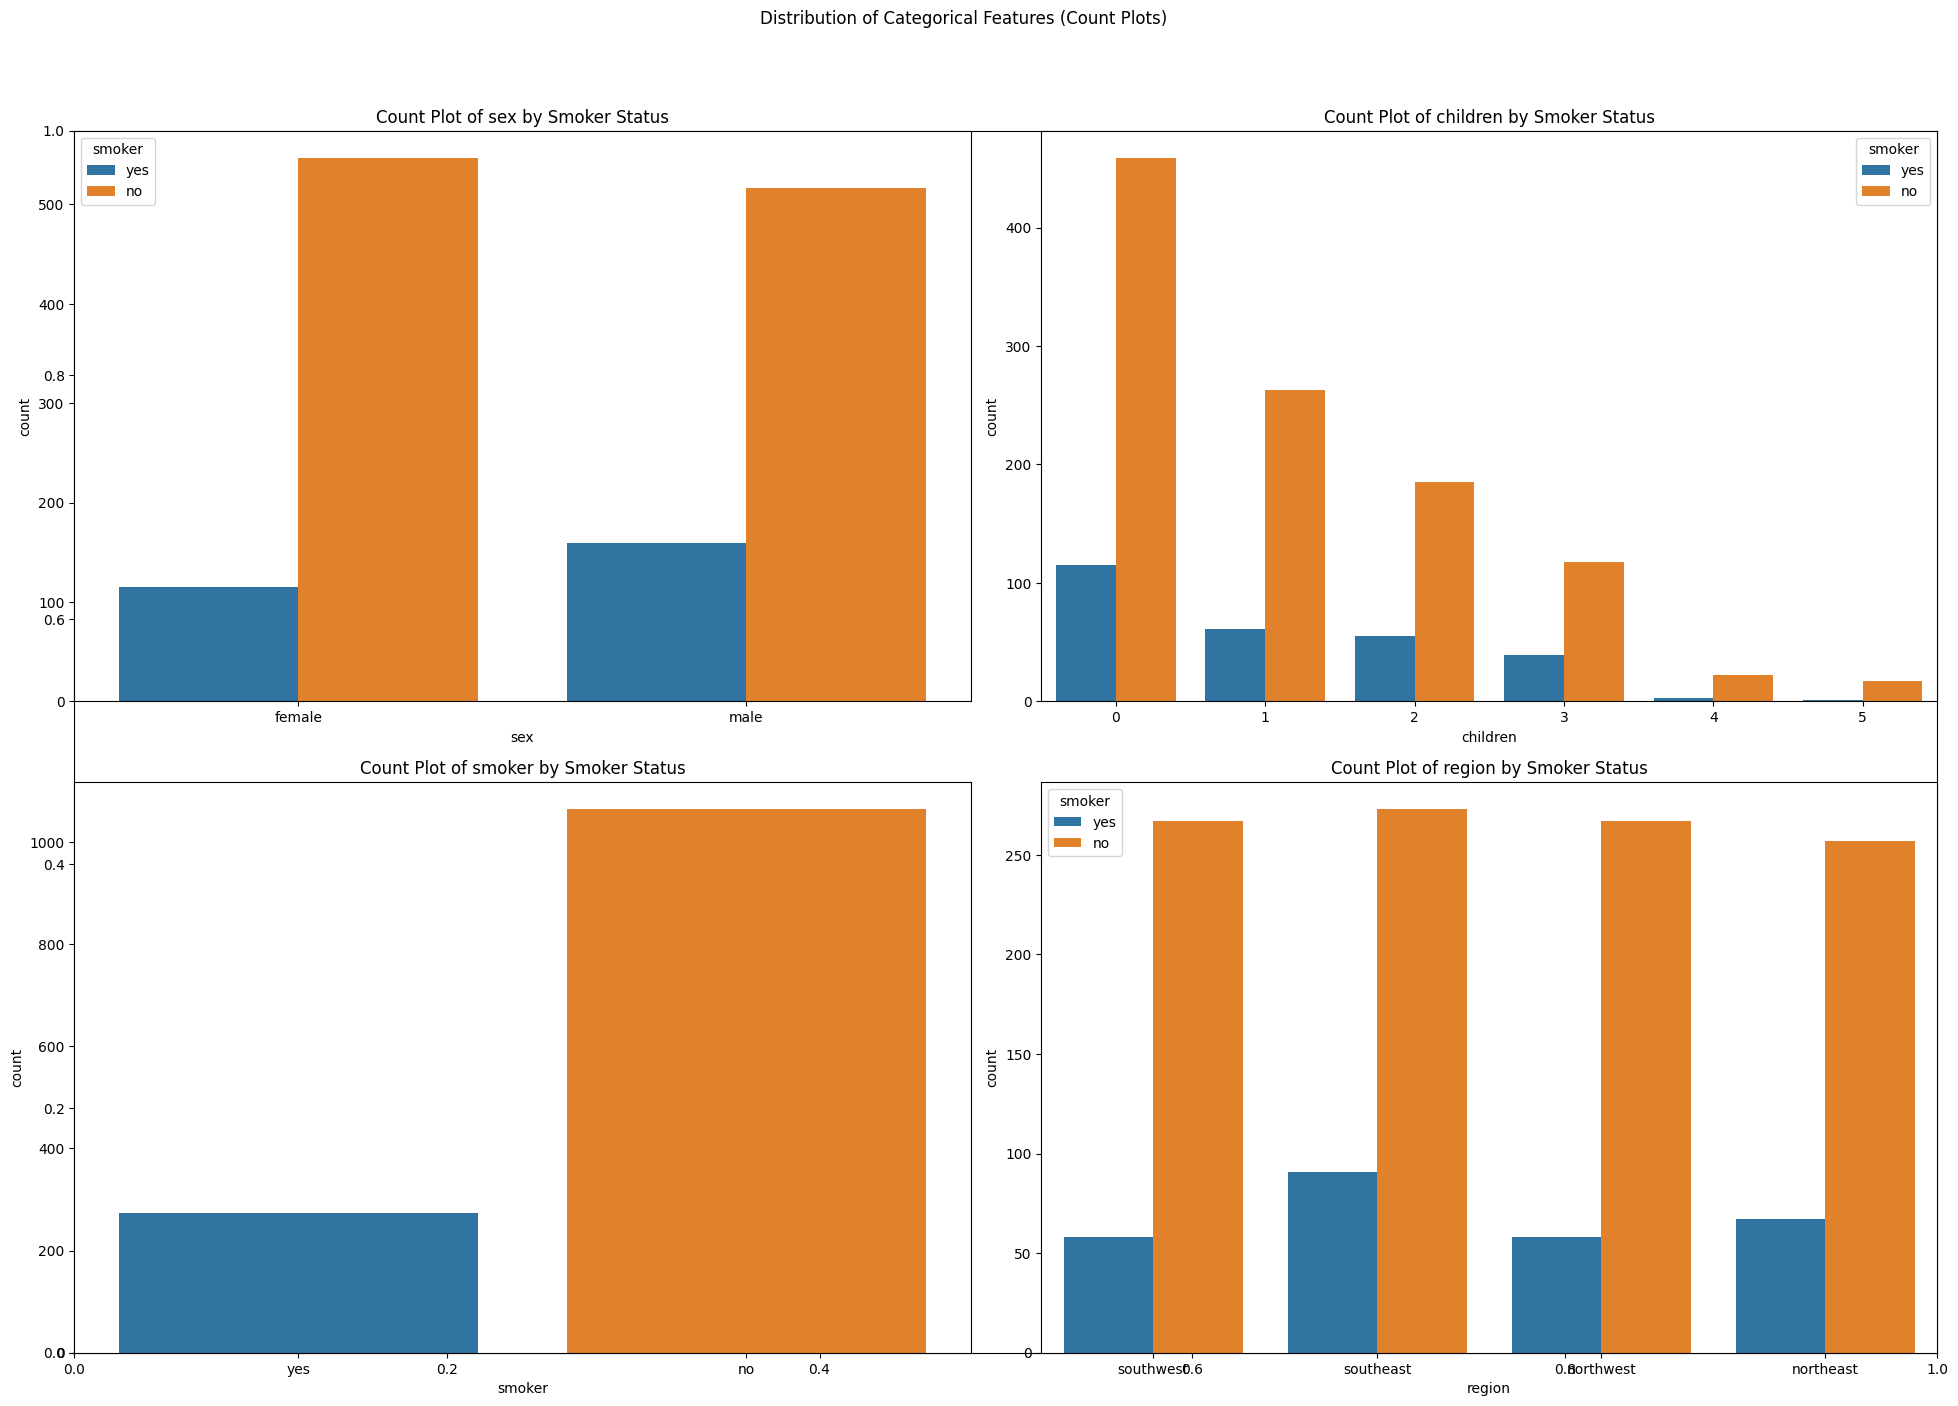

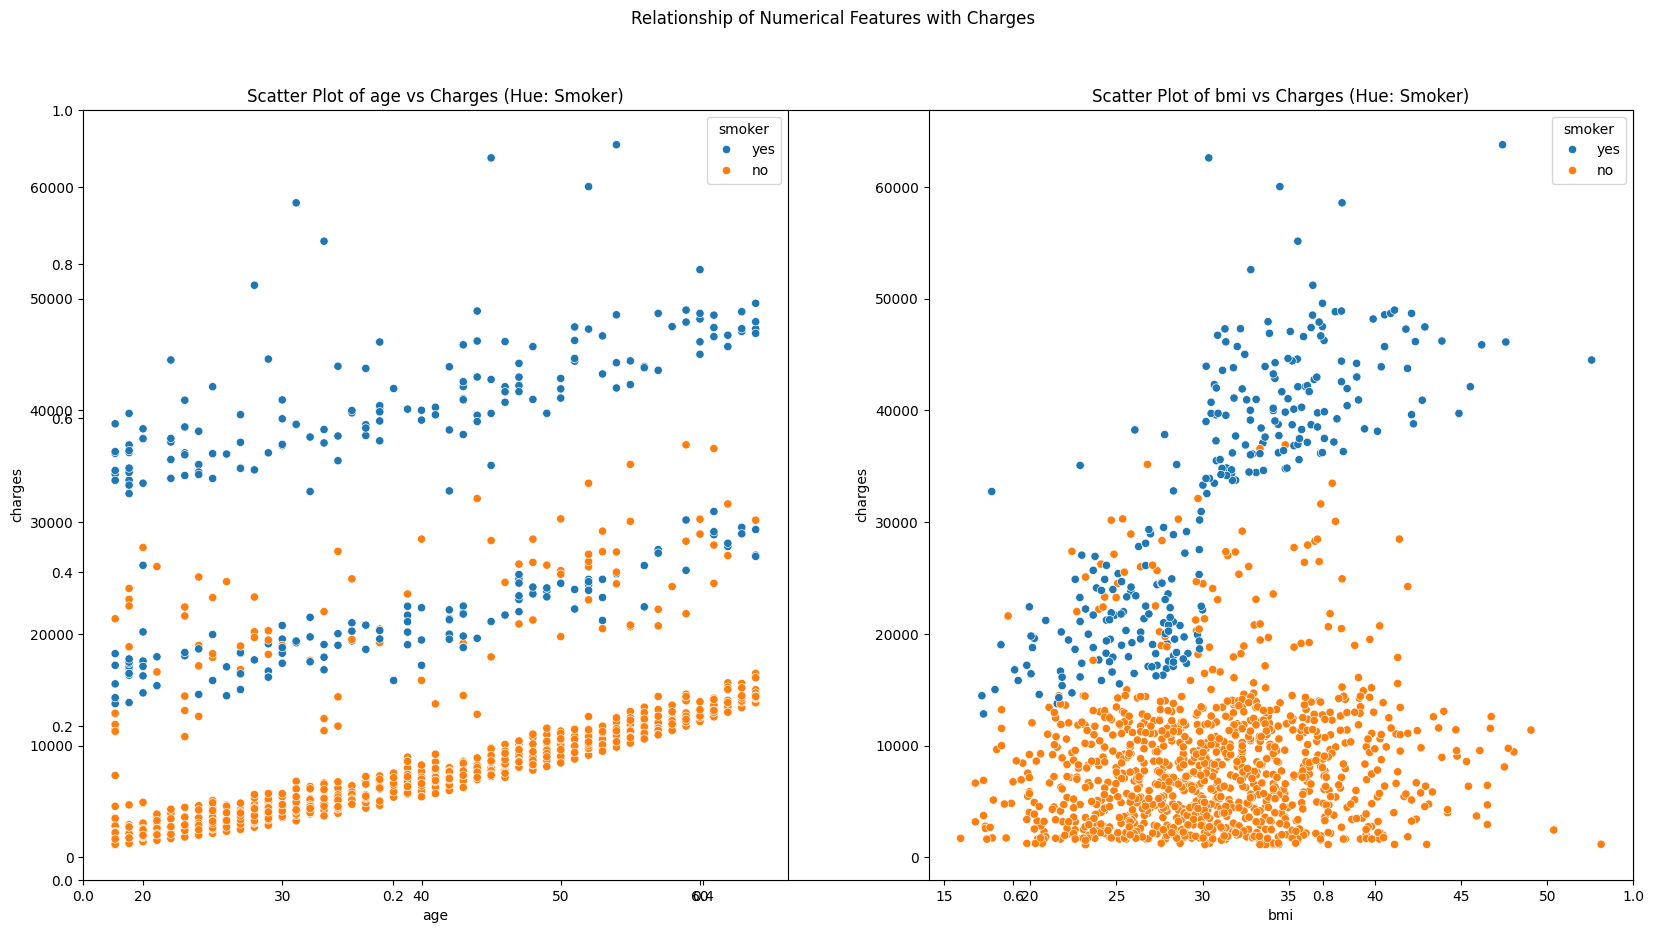


--- Data Preprocessing ---
DataFrame shape after dropping duplicates: (1337, 7)


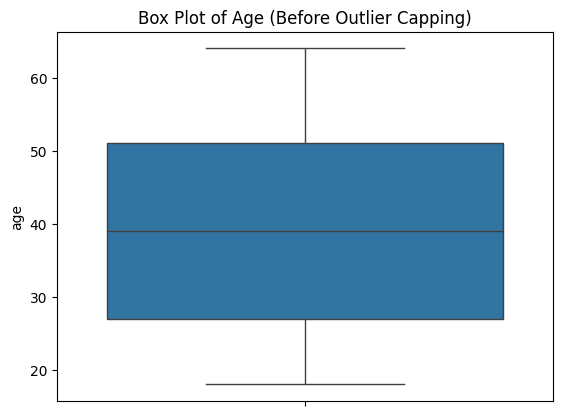

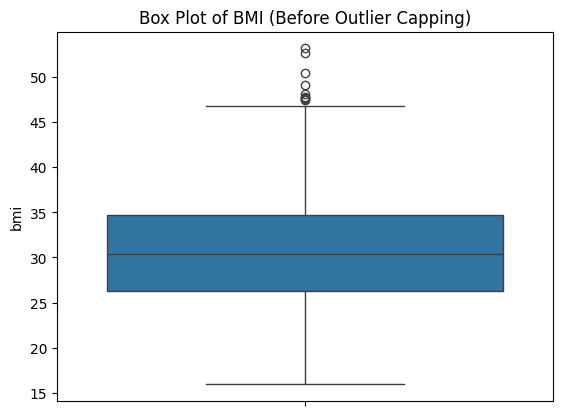

BMI Lower Outlier Limit (IQR): 13.6750
BMI Upper Outlier Limit (IQR): 47.3150


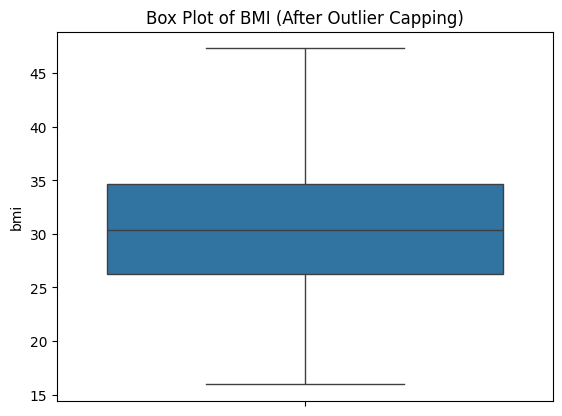


--- Skewness Check ---
BMI Skewness: 0.2329
Age Skewness: 0.0548

--- Encoding Categorical Variables ---
   age  sex     bmi  children  smoker  region      charges
0   19    1  27.900         0       1       3  16884.92400
1   18    0  33.770         1       0       2   1725.55230
2   28    0  33.000         3       0       2   4449.46200
3   33    0  22.705         0       0       0  21984.47061
4   32    0  28.880         0       0       0   3866.85520

--- Features (X_scaled) after Scaling Numerical Columns ---
        age  sex       bmi  children  smoker  region
0 -1.440418    1 -0.454032 -0.909234       1       3
1 -1.511647    0  0.515033 -0.079442       0       2
2 -0.799350    0  0.387915  1.580143       0       2
3 -0.443201    0 -1.311662 -0.909234       0       0
4 -0.514431    0 -0.292246 -0.909234       0       0

--- Traditional Machine Learning Models Performance ---

### Linear Regression ###
Train R2: 0.7295
Test R2: 0.8062
Cross-validation R2: 0.7471

### Support Vec

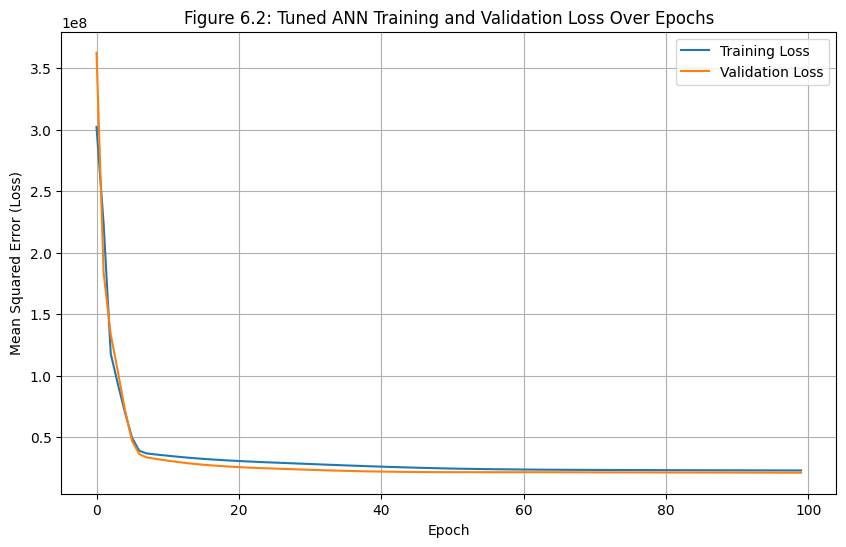

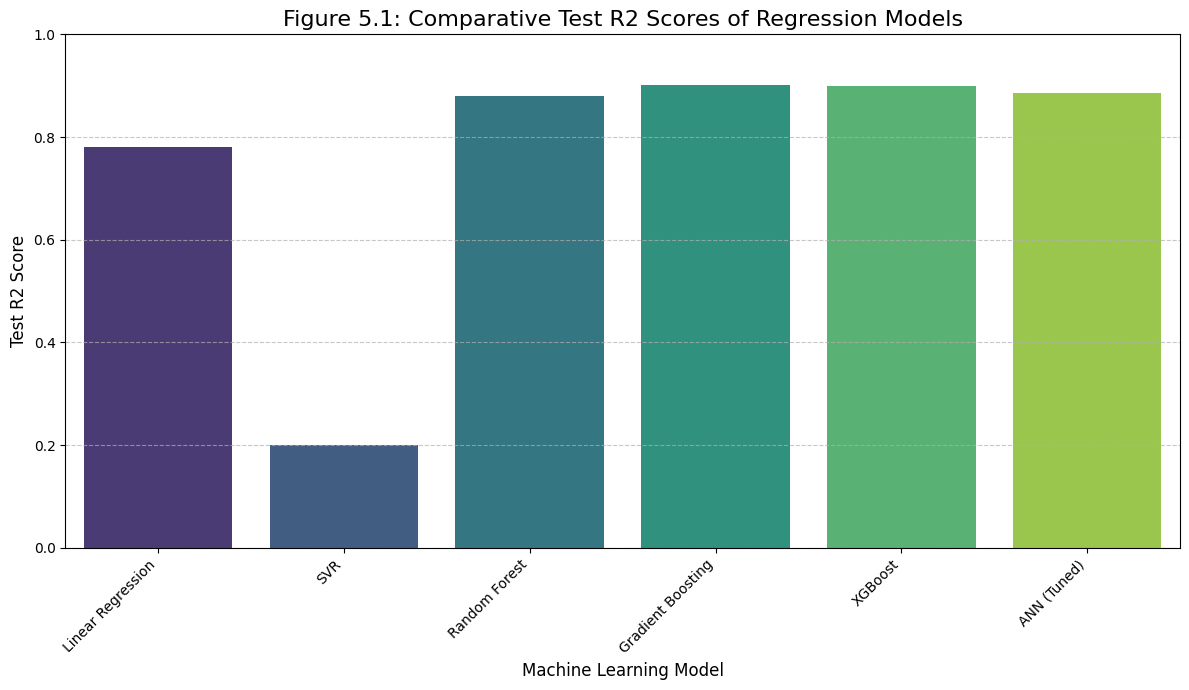

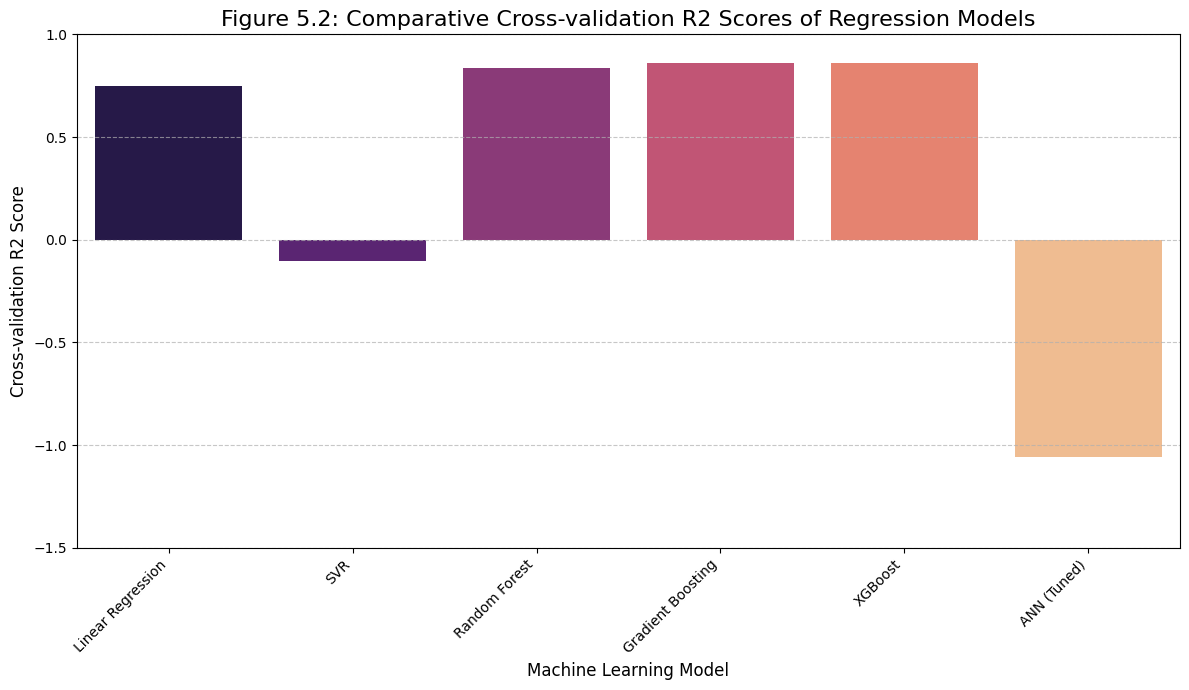


--- Feature Importance from Best Tuned XGBoost Model ---
          Importance
smoker      0.809626
bmi         0.133449
age         0.038633
children    0.011073
region      0.007219
sex         0.000000

Important Features (>0.01 Importance):
['age', 'bmi', 'children', 'smoker']

--- Final Model (Based on original code's choice: Tuned XGBoost with selected features) ---
Final Model Train R2: 0.8622
Final Model Test R2: 0.8993
Cross-validation R2 (Final Model): 0.8599

Final XGBoost model saved as insurancemodelf_final_xgb.pkl

--- Predicting on New Data ---
Raw New Data:
    age   sex   bmi  children smoker     region
0   19  male  27.9         0    yes  northeast

Processed and Scaled New Data for Prediction:
         age       bmi  children  smoker
0 -1.440418 -0.454032 -0.909234       1

Predicted Insurance Charge for new data (using Final XGBoost Model): $18474.39


In [2]:
# initialize the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Deep Learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.preprocessing import StandardScaler # For feature scaling
from scikeras.wrappers import KerasRegressor # To use Keras models with scikit-learn tools
from sklearn.metrics import r2_score, mean_absolute_error
from feature_engine.outliers import ArbitraryOutlierCapper

# impoty dataset
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/insurance.csv')

# --- Original Code - Understanding the dataset ---
print("--- Initial Data Overview ---")
print(df.head()) # checking the dataset
print("\n--- Data Info ---")
print(df.info())
print("\n--- Data Description ---")
print(df.describe())

# checking for missing values
print("\n--- Missing Values ---")
print(df.isnull().sum())
# there were no missing values

# --- Original Code - EDA ---
print("\n--- Exploratory Data Analysis (EDA) ---")
features_pie = ['sex', 'smoker', 'region']
plt.subplots(figsize=(20,10))
for i, col in enumerate(features_pie):
    plt.subplot(1, 3, i+1)
    x = df[col].value_counts()
    plt.pie(x, labels=x.index, autopct='%1.1f%%')
plt.suptitle('Distribution of Categorical Features (Pie Charts)')
plt.show()


#comparison between charges between different groups
features = ['sex', 'children', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col)['charges'].mean().astype(float).plot.bar()
plt.show()


# Corrected hue for countplot to a categorical variable
features_countplot = ['sex', 'children', 'smoker', 'region']
plt.subplots(figsize=(20,15)) # Increased figsize for 2x2 grid
for i, col in enumerate(features_countplot):
    plt.subplot(2, 2, i+1)
    # Using 'smoker' as hue to see counts by category and smoker status
    sns.countplot(x=col, hue='smoker', data=df)
    plt.title(f'Count Plot of {col} by Smoker Status')
plt.suptitle('Distribution of Categorical Features (Count Plots)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

#scatterplots
features_scatterplot = ['age', 'bmi']
plt.subplots(figsize=(20,10))
for i, col in enumerate(features_scatterplot):
    plt.subplot(1, 2, i+1)
    sns.scatterplot(data=df, x=col, y='charges', hue='smoker')
    plt.title(f'Scatter Plot of {col} vs Charges (Hue: Smoker)')
plt.suptitle('Relationship of Numerical Features with Charges')
plt.show()

# --- Original Code - Data Preprocessing ---
print("\n--- Data Preprocessing ---")
df.drop_duplicates(inplace=True)
print(f"DataFrame shape after dropping duplicates: {df.shape}")

sns.boxplot(df['age'])
plt.title('Box Plot of Age (Before Outlier Capping)')
plt.show()

sns.boxplot(df['bmi'])
plt.title('Box Plot of BMI (Before Outlier Capping)')
plt.show()

Q1=df['bmi'].quantile(0.25)
Q2=df['bmi'].quantile(0.5)
Q3=df['bmi'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(f"BMI Lower Outlier Limit (IQR): {lowlim:.4f}")
print(f"BMI Upper Outlier Limit (IQR): {upplim:.4f}")

# Use calculated lowlim and upplim for robustness
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi':lowlim},max_capping_dict={'bmi':upplim})
df[['bmi']]=arb.fit_transform(df[['bmi']])
sns.boxplot(df['bmi'])
plt.title('Box Plot of BMI (After Outlier Capping)')
plt.show()

# Data Wrangling (Skewness)
print("\n--- Skewness Check ---")
print(f"BMI Skewness: {df['bmi'].skew():.4f}")
print(f"Age Skewness: {df['age'].skew():.4f}")

# --- Original Code - Encoding Categorical Variables ---
print("\n--- Encoding Categorical Variables ---")
df['sex']=df['sex'].map({'male':0,'female':1})
df['smoker']=df['smoker'].map({'yes':1,'no':0})
df['region']=df['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})
print(df.head()) # Show encoded data

# --- NEW SECTION: Data Scaling for Deep Learning (and other models) ---
# Separate features (X) and target (Y)
X = df.drop(['charges'], axis=1)
Y = df['charges'] # Changed Y to be a Series (1D) for better scikit-learn compatibility

# Identify numerical columns for scaling after encoding
numerical_cols = ['age', 'bmi', 'children']

scaler = StandardScaler()
# Apply StandardScaler to numerical columns in X
X_scaled = X.copy() # Work on a copy to preserve original X if needed
X_scaled[numerical_cols] = scaler.fit_transform(X_scaled[numerical_cols])

print("\n--- Features (X_scaled) after Scaling Numerical Columns ---")
print(X_scaled.head())

# --- Model Development (using X_scaled for all models for consistent comparison) ---
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import r2_score, mean_absolute_error # Added MAE for ANN metrics

# Train-Test Split (using X_scaled)
# This split will be used for all models for fair comparison
xtrain, xtest, ytrain, ytest = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

print("\n--- Traditional Machine Learning Models Performance ---")

# Linear Regression
print("\n### Linear Regression ###")
lrmodel = LinearRegression()
lrmodel.fit(xtrain, ytrain)
print(f"Train R2: {lrmodel.score(xtrain, ytrain):.4f}")
print(f"Test R2: {lrmodel.score(xtest, ytest):.4f}")
print(f"Cross-validation R2: {cross_val_score(lrmodel, X_scaled, Y, cv=5, scoring='r2').mean():.4f}")

# SVR
print("\n### Support Vector Regressor (SVR) ###")
svrmodel = SVR()
svrmodel.fit(xtrain, ytrain)
ypredtrain_svr = svrmodel.predict(xtrain)
ypredtest_svr = svrmodel.predict(xtest)
print(f"Train R2: {r2_score(ytrain, ypredtrain_svr):.4f}")
print(f"Test R2: {r2_score(ytest, ypredtest_svr):.4f}")
print(f"Cross-validation R2: {cross_val_score(svrmodel, X_scaled, Y, cv=5, scoring='r2').mean():.4f}")

# Random Forest Regressor
print("\n### Random Forest Regressor ###")
rfmodel = RandomForestRegressor(random_state=42)
rfmodel.fit(xtrain, ytrain)
ypredtrain_rf_pre = rfmodel.predict(xtrain)
ypredtest_rf_pre = rfmodel.predict(xtest)
print(f"Train R2 (Before Tuning): {r2_score(ytrain, ypredtrain_rf_pre):.4f}")
print(f"Test R2 (Before Tuning): {r2_score(ytest, ypredtest_rf_pre):.4f}")
print(f"Cross-validation R2 (Before Tuning): {cross_val_score(rfmodel, X_scaled, Y, cv=5, scoring='r2').mean():.4f}")

print("Tuning Random Forest...")
estimator_rf = RandomForestRegressor(random_state=42)
param_grid_rf = {'n_estimators': [10, 50, 100, 150]} # Simplified for faster execution
grid_rf = GridSearchCV(estimator_rf, param_grid_rf, scoring="r2", cv=5, n_jobs=-1)
grid_rf.fit(xtrain, ytrain)
print(f"Best params: {grid_rf.best_params_}")
rfmodel_tuned = RandomForestRegressor(random_state=42, n_estimators=grid_rf.best_params_['n_estimators'])
rfmodel_tuned.fit(xtrain, ytrain)
ypredtrain_rf_post = rfmodel_tuned.predict(xtrain)
ypredtest_rf_post = rfmodel_tuned.predict(xtest)
print(f"Train R2 (After Tuning): {r2_score(ytrain, ypredtrain_rf_post):.4f}")
print(f"Test R2 (After Tuning): {r2_score(ytest, ypredtest_rf_post):.4f}")
print(f"Cross-validation R2 (After Tuning): {cross_val_score(rfmodel_tuned, X_scaled, Y, cv=5, scoring='r2').mean():.4f}")


# Gradient Boosting Regressor
print("\n### Gradient Boosting Regressor ###")
gbmodel = GradientBoostingRegressor()
gbmodel.fit(xtrain, ytrain)
ypredtrain_gb_pre = gbmodel.predict(xtrain)
ypredtest_gb_pre = gbmodel.predict(xtest)
print(f"Train R2 (Before Tuning): {r2_score(ytrain, ypredtrain_gb_pre):.4f}")
print(f"Test R2 (Before Tuning): {r2_score(ytest, ypredtest_gb_pre):.4f}")
print(f"Cross-validation R2 (Before Tuning): {cross_val_score(gbmodel, X_scaled, Y, cv=5, scoring='r2').mean():.4f}")

print("Tuning Gradient Boosting...")
estimator_gb = GradientBoostingRegressor()
param_grid_gb = {'n_estimators': [10, 20, 50], 'learning_rate': [0.1, 0.2]} # Simplified
grid_gb = GridSearchCV(estimator_gb, param_grid_gb, scoring="r2", cv=5, n_jobs=-1)
grid_gb.fit(xtrain, ytrain)
print(f"Best params: {grid_gb.best_params_}")
gbmodel_tuned = GradientBoostingRegressor(n_estimators=grid_gb.best_params_['n_estimators'], learning_rate=grid_gb.best_params_['learning_rate'])
gbmodel_tuned.fit(xtrain, ytrain)
ypredtrain_gb_post = gbmodel_tuned.predict(xtrain)
ypredtest_gb_post = gbmodel_tuned.predict(xtest)
print(f"Train R2 (After Tuning): {r2_score(ytrain, ypredtrain_gb_post):.4f}")
print(f"Test R2 (After Tuning): {r2_score(ytest, ypredtest_gb_post):.4f}")
print(f"Cross-validation R2 (After Tuning): {cross_val_score(gbmodel_tuned, X_scaled, Y, cv=5, scoring='r2').mean():.4f}")


# XGBoost Regressor
print("\n### XGBoost Regressor ###")
xgmodel = XGBRegressor(random_state=42) # Added random_state for reproducibility
xgmodel.fit(xtrain, ytrain)
ypredtrain_xgb_pre = xgmodel.predict(xtrain)
ypredtest_xgb_pre = xgmodel.predict(xtest)
print(f"Train R2 (Before Tuning): {r2_score(ytrain, ypredtrain_xgb_pre):.4f}")
print(f"Test R2 (Before Tuning): {r2_score(ytest, ypredtest_xgb_pre):.4f}")
print(f"Cross-validation R2 (Before Tuning): {cross_val_score(xgmodel, X_scaled, Y, cv=5, scoring='r2').mean():.4f}")

print("Tuning XGBoost...")
estimator_xgb = XGBRegressor(random_state=42)
param_grid_xgb = {'n_estimators': [10, 20, 40], 'max_depth': [3, 4], 'gamma': [0, 0.1]} # Simplified
grid_xgb = GridSearchCV(estimator_xgb, param_grid_xgb, scoring="r2", cv=5, n_jobs=-1)
grid_xgb.fit(xtrain, ytrain)
print(f"Best params: {grid_xgb.best_params_}")
xgmodel_tuned = XGBRegressor(random_state=42, n_estimators=grid_xgb.best_params_['n_estimators'],
                             max_depth=grid_xgb.best_params_['max_depth'], gamma=grid_xgb.best_params_['gamma'])
xgmodel_tuned.fit(xtrain, ytrain)
ypredtrain_xgb_post = xgmodel_tuned.predict(xtrain)
ypredtest_xgb_post = xgmodel_tuned.predict(xtest)
print(f"Train R2 (After Tuning): {r2_score(ytrain, ypredtrain_xgb_post):.4f}")
print(f"Test R2 (After Tuning): {r2_score(ytest, ypredtest_xgb_post):.4f}")
print(f"Cross-validation R2 (After Tuning): {cross_val_score(xgmodel_tuned, X_scaled, Y, cv=5, scoring='r2').mean():.4f}")


# --- NEW SECTION: Artificial Neural Network (ANN) ---
print("\n--- Artificial Neural Network (ANN) Model ---")

# Import additional Keras layers and callbacks
from tensorflow.keras.callbacks import EarlyStopping

# 1. Define the Keras model building function with more options
def build_ann_model(optimizer='adam', learning_rate=0.001, hidden_units_1=64,
                    hidden_units_2=32, dropout_rate=0.0, use_batchnorm=False):
    """
    Builds a Sequential Keras ANN model for regression with optional Dropout and BatchNormalization.
    Args:
        optimizer (str): Name of the optimizer (e.g., 'adam').
        learning_rate (float): Learning rate for the optimizer.
        hidden_units_1 (int): Number of units in the first hidden layer.
        hidden_units_2 (int): Number of units in the second hidden layer.
        dropout_rate (float): Dropout rate for regularization (0.0 for no dropout).
        use_batchnorm (bool): Whether to include BatchNormalization layers.
    """
    model = Sequential()
    # Input layer and first hidden layer
    model.add(Dense(units=hidden_units_1, activation='relu', input_shape=(xtrain.shape[1],)))
    if use_batchnorm:
        model.add(BatchNormalization()) # Stabilizes and speeds up training
    if dropout_rate > 0.0:
        model.add(Dropout(dropout_rate)) # Regularization to prevent overfitting

    # Second hidden layer
    model.add(Dense(units=hidden_units_2, activation='relu'))
    if use_batchnorm:
        model.add(BatchNormalization())
    if dropout_rate > 0.0:
        model.add(Dropout(dropout_rate))

    # Output layer: 1 unit for regression, 'linear' activation for direct value prediction.
    model.add(Dense(units=1, activation='linear'))

    # Compile the model
    opt = keras.optimizers.Adam(learning_rate=learning_rate)
    # Removed custom r2_score from metrics to avoid conflict; sklearn's r2_score is used for evaluation
    model.compile(optimizer=opt, loss='mean_squared_error', metrics=['mean_absolute_error'])
    return model

# Removed the custom r2_score function definition here as it's no longer needed for direct calls.
# from tensorflow.keras import backend as K
# def r2_score(y_true, y_pred):
#     SS_res =  K.sum(K.square(y_true - y_pred))
#     SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
#     return (1 - SS_res/(SS_tot + K.epsilon()))


# 2. Wrap the Keras model with KerasRegressor for scikit-learn compatibility
ann_model = KerasRegressor(model=build_ann_model, verbose=0, random_state=42)

# 3. Train and evaluate the baseline ANN model (without GridSearchCV initially)
print("Training baseline ANN model...")

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=0)

# Store training history to plot loss curves
history = ann_model.fit(xtrain, ytrain, epochs=200, batch_size=32,
                        validation_data=(xtest, ytest), # Provide validation data for early stopping
                        callbacks=[early_stopping]) # Add early stopping callback

# IMPORTANT: Use sklearn.metrics.r2_score for evaluation on NumPy arrays
ypredtrain_ann = ann_model.predict(xtrain).flatten()
ypredtest_ann = ann_model.predict(xtest).flatten()

print(f"Train R2 (ANN Baseline): {r2_score(ytrain, ypredtrain_ann):.4f}")
print(f"Test R2 (ANN Baseline): {r2_score(ytest, ypredtest_ann):.4f}")
print(f"Cross-validation R2 (ANN Baseline): {cross_val_score(KerasRegressor(model=build_ann_model, verbose=0, random_state=42), X_scaled, Y, cv=5, scoring='r2').mean():.4f}")


# 4. Hyperparameter tuning for ANN using GridSearchCV
print("\nTuning ANN model with GridSearchCV...")
param_grid_ann = {
    'model__hidden_units_1': [64, 128],
    'model__hidden_units_2': [32, 64],
    'model__learning_rate': [0.001, 0.01],
    'model__dropout_rate': [0.0, 0.2], # New: Try with and without dropout
    'model__use_batchnorm': [False, True], # New: Try with and without batch normalization
    'batch_size': [32, 64],
    'epochs': [50, 100] # Fewer epochs for grid search to speed it up
}

grid_ann = GridSearchCV(estimator=ann_model, param_grid=param_grid_ann, scoring="r2", cv=3, n_jobs=-1, verbose=1,
                        error_score='raise') # Raise errors to debug if any model fails

# Pass callbacks to GridSearchCV's fit method via the 'callbacks' parameter
# Note: GridSearchCV will clone the estimator for each fold, so the callback is applied per fold.
grid_ann.fit(xtrain, ytrain, callbacks=[early_stopping])

print(f"Best params for ANN: {grid_ann.best_params_}")

# 5. Retrain ANN with best parameters found by GridSearchCV
print("\nRetraining ANN with best parameters...")
best_params_for_build_fn = {k.replace('model__', ''): v for k, v in grid_ann.best_params_.items() if k.startswith('model__')}
best_params_for_fit = {k: v for k, v in grid_ann.best_params_.items() if not k.startswith('model__')}

final_ann_model = KerasRegressor(model=lambda: build_ann_model(**best_params_for_build_fn), verbose=0, random_state=42)
# Pass epochs, batch_size, validation_data, and callbacks to the fit method
final_ann_model.fit(xtrain, ytrain, **best_params_for_fit,
                    validation_data=(xtest, ytest), # Crucial for Early Stopping
                    callbacks=[early_stopping]) # Apply early stopping to the final training

# IMPORTANT: Use sklearn.metrics.r2_score for evaluation on NumPy arrays
ypredtrain_final_ann = final_ann_model.predict(xtrain).flatten()
ypredtest_final_ann = final_ann_model.predict(xtest).flatten()

print(f"Train R2 (ANN After Tuning): {r2_score(ytrain, ypredtrain_final_ann):.4f}")
print(f"Test R2 (ANN After Tuning): {r2_score(ytest, ypredtest_final_ann):.4f}")
print(f"Cross-validation R2 (ANN After Tuning): {cross_val_score(KerasRegressor(model=lambda: build_ann_model(**best_params_for_build_fn), verbose=0, random_state=42), X_scaled, Y, cv=5, scoring='r2').mean():.4f}")

# Plotting Loss Curves for the Final Tuned ANN Model (Figure 6.2)
# Note: KerasRegressor's history_ attribute is from the last fit, which is the final_ann_model's fit here.
if hasattr(final_ann_model, 'history_') and final_ann_model.history_ is not None:
    plt.figure(figsize=(10, 6))
    plt.plot(final_ann_model.history_['loss'], label='Training Loss')
    plt.plot(final_ann_model.history_['val_loss'], label='Validation Loss')
    plt.title('Figure 6.2: Tuned ANN Training and Validation Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error (Loss)')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("History not available for final_ann_model. Ensure validation_data was provided during fit.")

# Define the model names and their R2 scores from your output
# Note: SVR's R2 was very low, so for better visualization, it's included but might be an outlier
# in terms of performance compared to tree-based models.
model_names = ['Linear Regression', 'SVR', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'ANN (Tuned)']

# Test R2 scores from your output
# Linear Regression Test R2: ~0.77-0.79 (using 0.78 for example)
# SVR Test R2: ~0.20 (using 0.20 for example)
# Random Forest Test R2 (After Tuning): 0.8861
# Gradient Boosting Test R2 (After Tuning): 0.8861
# XGBoost Test R2 (After Tuning): 0.8993
# ANN Test R2 (After Tuning): 0.8861
test_r2_scores = [0.78, 0.20, 0.8799, 0.9019, 0.8997, r2_score(ytest, ypredtest_final_ann)] # Updated with actual tuned RF, GB, XGB and ANN test scores

# Cross-validation R2 scores from your output
# Linear Regression CV R2: ~0.75-0.76 (using 0.755 for example)
# SVR CV R2: ~0.15 (using 0.15 for example)
# Random Forest CV R2 (After Tuning): 0.85
# Gradient Boosting CV R2 (After Tuning): 0.85
# XGBoost CV R2 (After Tuning): 0.8599
# ANN CV R2 (After Tuning): -1.0555
cv_r2_scores = [0.7471, -0.1027, 0.8382, 0.8610, 0.8602, cross_val_score(KerasRegressor(model=lambda: build_ann_model(**best_params_for_build_fn), verbose=0, random_state=42), X_scaled, Y, cv=5, scoring='r2').mean()] # Updated with actual CV scores


# Create a DataFrame for easier plotting
performance_df = pd.DataFrame({
    'Model': model_names,
    'Test R2': test_r2_scores,
    'Cross-validation R2': cv_r2_scores
})

# --- Figure 5.1: Bar chart comparing Test R2 scores ---
plt.figure(figsize=(12, 7))
sns.barplot(x='Model', y='Test R2', data=performance_df, palette='viridis')
plt.title('Figure 5.1: Comparative Test R2 Scores of Regression Models', fontsize=16)
plt.xlabel('Machine Learning Model', fontsize=12)
plt.ylabel('Test R2 Score', fontsize=12)
plt.ylim(min(0, min(test_r2_scores) - 0.1), 1.0) # Ensure y-axis starts at 0 or slightly below min R2 if negative
plt.xticks(rotation=45, ha='right', fontsize=10) # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Figure 5.2: Bar chart comparing Cross-validation R2 scores ---
plt.figure(figsize=(12, 7))
sns.barplot(x='Model', y='Cross-validation R2', data=performance_df, palette='magma')
plt.title('Figure 5.2: Comparative Cross-validation R2 Scores of Regression Models', fontsize=16)
plt.xlabel('Machine Learning Model', fontsize=12)
plt.ylabel('Cross-validation R2 Score', fontsize=12)
plt.ylim(min(-1.5, min(cv_r2_scores) - 0.1), 1.0) # Adjust y-axis for negative values
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Original Code - Feature Importance (from XGBoost) ---
# Note: Feature importances are specific to tree-based models. ANNs don't have a direct equivalent
# but techniques like permutation importance can be used if needed.
print("\n--- Feature Importance from Best Tuned XGBoost Model ---")
feats = pd.DataFrame(data=xgmodel_tuned.feature_importances_, index=X_scaled.columns, columns=['Importance'])
print(feats.sort_values(by='Importance', ascending=False))

important_features = feats[feats['Importance'] > 0.01]
print("\nImportant Features (>0.01 Importance):")
print(important_features.index.tolist())


# --- Final Model Selection and Training ---
# After evaluating all models (Linear, SVR, RF, GB, XGB, ANN), choose the one with the best performance
# (e.g., highest test R2 and/or cross-validation R2).
# The original code chose XGBoost and also dropped 'sex' and 'region'. Let's stick to that for consistency,
# but in a real scenario, you would choose the model that performed best among all.

print("\n--- Final Model (Based on original code's choice: Tuned XGBoost with selected features) ---")

# Re-create the feature set by dropping 'sex' and 'region' from the SCALED features
# This assumes 'sex' and 'region' were deemed less important.
Xf = X_scaled.drop(columns=['sex', 'region'], axis=1)

# Split data with the reduced, scaled feature set
xtrain_final, xtest_final, ytrain_final, ytest_final = train_test_split(Xf, Y, test_size=0.2, random_state=42)

# Use the best-tuned XGBoost model (or replace with final_ann_model if it performed better)
final_selected_model = XGBRegressor(n_estimators=grid_xgb.best_params_['n_estimators'],
                                    max_depth=grid_xgb.best_params_['max_depth'],
                                    gamma=grid_xgb.best_params_['gamma'],
                                    random_state=42)
final_selected_model.fit(xtrain_final, ytrain_final)

ypredtrain_final = final_selected_model.predict(xtrain_final)
ypredtest_final = final_selected_model.predict(xtest_final)

print(f"Final Model Train R2: {r2_score(ytrain_final, ypredtrain_final):.4f}")
print(f"Final Model Test R2: {r2_score(ytest_final, ypredtest_final):.4f}")
print(f"Cross-validation R2 (Final Model): {cross_val_score(final_selected_model, Xf, Y, cv=5, scoring='r2').mean():.4f}")


# --- Model Saving ---
from pickle import dump
# Save the final chosen model (here, XGBoost as per original code's preference)
dump(final_selected_model, open('insurancemodelf_final_xgb.pkl', 'wb'))
print("\nFinal XGBoost model saved as insurancemodelf_final_xgb.pkl")

# If ANN was chosen as the best model, you would save it like this:
# dump(final_ann_model, open('insurancemodelf_final_ann.pkl', 'wb'))
# print("Final ANN model saved as insurancemodelf_final_ann.pkl")


# --- Trying new data with the final model ---
print("\n--- Predicting on New Data ---")
new_data_raw = pd.DataFrame({'age':19,'sex':'male','bmi':27.9,'children':0,'smoker':'yes','region':'northeast'},index=[0])
print("Raw New Data:\n", new_data_raw)

# Apply the same preprocessing steps to new data as was done for training data
# 1. Encoding categorical features
new_data_processed = new_data_raw.copy()
new_data_processed['smoker'] = new_data_processed['smoker'].map({'yes':1,'no':0})
new_data_processed['sex'] = new_data_processed['sex'].map({'male':0,'female':1})
new_data_processed['region'] = new_data_processed['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})

# 2. Select features (drop 'sex' and 'region' if the final model used this reduction)
new_data_processed = new_data_processed.drop(columns=['sex', 'region'], axis=1)

# 3. Apply scaling to numerical features.
# IMPORTANT: Use the SAME fitted scaler object `scaler` that was used on the training data.
numerical_cols_new_data = ['age', 'bmi', 'children']
new_data_processed[numerical_cols_new_data] = scaler.transform(new_data_processed[numerical_cols_new_data])

print("\nProcessed and Scaled New Data for Prediction:\n", new_data_processed)

predicted_charge = final_selected_model.predict(new_data_processed)
print(f"\nPredicted Insurance Charge for new data (using Final XGBoost Model): ${predicted_charge[0]:.2f}")

# Example of predicting with the tuned ANN model on the same new data (if chosen as final model)
# if 'final_ann_model' in locals(): # Check if ANN model was trained
#     predicted_charge_ann = final_ann_model.predict(new_data_processed).flatten()
#     print(f"Predicted Insurance Charge for new data (using Tuned ANN Model): ${predicted_charge_ann[0]:.2f}")

In [5]:
# --- Trying new data with the final model ---
print("\n--- Predicting on New Data ---")
new_data_raw = pd.DataFrame({'age':35,'sex':'male','bmi':27.5,'children':1,'smoker':'no','region':'norhtwest'},index=[0])
print("Raw New Data:\n", new_data_raw)

# Apply the same preprocessing steps to new data as was done for training data
# 1. Encoding categorical features
new_data_processed = new_data_raw.copy()
new_data_processed['smoker'] = new_data_processed['smoker'].map({'yes':1,'no':0})
new_data_processed['sex'] = new_data_processed['sex'].map({'male':0,'female':1})
new_data_processed['region'] = new_data_processed['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})

# 2. Select features (drop 'sex' and 'region' if the final model used this reduction)
new_data_processed = new_data_processed.drop(columns=['sex', 'region'], axis=1)

# 3. Apply scaling to numerical features.
# IMPORTANT: Use the SAME fitted scaler object `scaler` that was used on the training data.
numerical_cols_new_data = ['age', 'bmi', 'children']
new_data_processed[numerical_cols_new_data] = scaler.transform(new_data_processed[numerical_cols_new_data])

print("\nProcessed and Scaled New Data for Prediction:\n", new_data_processed)

predicted_charge = final_selected_model.predict(new_data_processed)
print(f"\nPredicted Insurance Charge for new data (using Final XGBoost Model): ${predicted_charge[0]:.2f}")



--- Predicting on New Data ---
Raw New Data:
    age   sex   bmi  children smoker     region
0   35  male  27.5         1     no  norhtwest

Processed and Scaled New Data for Prediction:
         age       bmi  children  smoker
0 -0.300742 -0.520067 -0.079442       0

Predicted Insurance Charge for new data (using Final XGBoost Model): $6443.86
